# 추진 배경 및 목적 

* 집 내부 환경 뿐 아니라 집 외부 환경은 현재 집 값 뿐 아니라, 향후 집값의 변화에도 영향을 미친다. 
* 집 값의 영향 요인을 확인하기 위해, 1970년대 Boston 주택 가격과 그 가격에 영향을 주는 요인들에 대한 Data set에 탐색적 분석, 회귀분석, 모델 평가를 적용하여 변수간 상관관계를 확인한다. 
* 데이터 분석을 통해 집값에 큰 영향을 미치는 요인을 분석하고, 예측하기 위한 모델을 만들고자 한다. 

# 0. 패키지 불러오기 

In [99]:
#데이터 구성: Series,DataFrame
import pandas as pd

#행렬 연산
import numpy as np

#데이터 시각
import matplotlib.pyplot as plt
import seaborn as sns

#표준화하기 
from sklearn.preprocessing import StandardScaler

#Robust scale  
from sklearn.preprocessing import scale,minmax_scale,robust_scale

#회귀분석
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.feature_selection import RFE

#선형회귀분석 
from sklearn.linear_model import LinearRegression

#qqplot,회귀분석의 상수항 추가 
from statsmodels.api import qqplot
from statsmodels.api import add_constant

#선형 모델 formula 
import statsmodels.formula.api as smf

# train-test 분리 
from sklearn.model_selection import train_test_split

# 의사 결정나무 
from sklearn.tree import DecisionTreeRegressor

#평가함수
from statsmodels.tools.eval_measures import rmse 

from sklearn.tree import export_graphviz
import graphviz

#jupyter notebook 사용시 그래프 자동 출력 옵션 
%matplotlib inline

#다중공선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 한글 폰트 적용 
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

# 1. 데이터 불러오기 

### 1-1 데이터 구성하기 

In [100]:
df_raw=pd.read_csv("/home/piai/Downloads/BOSTON_HOUSING.csv", engine='python')
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [101]:
df_raw.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,22.533,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,9.197,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,5.000,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,17.025,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,21.200,0.257,0.000,9.690,0.000,0.538,6.209,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,25.000,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,50.000,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


### 1-2 변수 탐색 

1) 목표 변수 
- MEDV : 주택가격 (중앙값)
    
2) 설명 변수 
- CRIM : 범죄율 (연속형)
- ZN : 주거지 비율 (연속형)
- INDUS : 비소매업 비율 (연속형)
- CHAS : 강조망 여부 [1-조망, 0-비조망] (이산형)
- NOX : 산화질소 농도 (연속형)
- RM : 주거당 평균 객실 수 (연속형) 
- AGE : 노후 건물 비율 (연속형) 
- DIS : 중심지(노동센터) 접근 거리 (연속형)
- RAD : 고속도로 접근 편이성 지수 (연속형) 
- TAX : 재산세율 (연속형) 
- PTRATIO : 학생당 교사 비율 (연속형)
- B : 흑인 인구 비율 (연속형) 
- LSTAT : 저소득층 비율 (연속형) 

### 1-3 가설 설정 

1) 환경적 요건 
* 강 조망이 있으면 주택 가격이 높을 것이다. 
* 산화 질소 농도가 높으면 주택 가격이 낮을 것이다. 

2) 접근성 요건 
* 비주거 상업지역 비율이 높을수록 집값은 높을 것이다.  
* 중심지 (직업 센터)  접근 거리가 가까울수록 주택 가격이 높을 것이다. 
* 방사형 도로 접근성 지수가 높을수록 주택 가격이 높을 것이다. 

3) 이웃 요건 
* 학생/교사 비율이 낮을수록 주택 가격이 높을 것이다.
* 흑인 인구 비율이 높을수록 주택 가격이 낮을 것이다. 
* 저소득층 비율이 높을수록 주택 가격이 낮을 것이다.

4) 사회 경제적 요건 
* 1인당 범죄율이 높을수록 주택 가격이 낮을 것이다. 
* 자기 소유 집 비율이 높을 수록 주택 가격이 높아질 것이다. 
* 재산 세율이 낮으면 주택 가격이 낮을 것이다. 

### 1-4 데이터 전처리 

In [102]:
# 결측 처리 
df_raw.isnull().sum(axis=0)

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [103]:
# 변수별 타입 분석 
df_raw.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [104]:
# CHAS 타입 변경 
df_raw=df_raw.astype({'CHAS':object})

In [105]:
# 연속형 변수, 범주형 변수 구분 
df_raw_numeric=df_raw.select_dtypes(exclude='object')
df_raw_object=df_raw.select_dtypes(include='object')

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


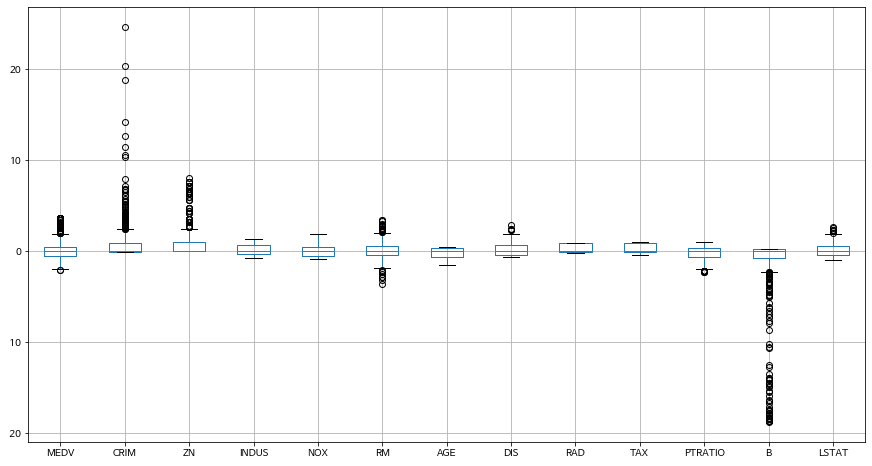

In [106]:
# 표준화하여 Boxplot을 그려 이상치 제거 
df_raw_1=robust_scale(df_raw_numeric)
df_raw_1=pd.DataFrame(df_raw_1,columns = df_raw_numeric.columns)
df_raw_1.boxplot(figsize=(15,8))

#### CRIM(범죄율)과 B(흑인 인구 비율)에서 이상치가 확인되었다. 
#### 1) CRIM의 이상치는 연속성을 띄지 않는 범위에서 삭제하기로 한다. 
#### 2) B의 이상치는 연속성을 띄므로 제거하지 않는다. 


In [107]:
df_raw_1.sort_values(by=["CRIM"], axis=0, ascending=False)[0:10]

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,-1.354232,24.678376,0.0,0.651433,0.760000,1.029133,0.293578,-0.579924,0.95,0.868217,0.410714,0.261901,0.584708
418,-1.554859,20.382984,0.0,0.651433,0.805714,-0.340787,0.458716,-0.454902,0.95,0.868217,0.410714,-17.987272,0.925537
405,-2.031348,18.821581,0.0,0.651433,0.885714,-0.712060,0.458716,-0.577042,0.95,0.868217,0.410714,-0.310349,1.161419
410,-0.777430,14.152645,0.0,0.651433,0.337143,-0.611789,0.458716,-0.581057,0.95,0.868217,0.410714,-18.651620,-0.124938
414,-1.780564,12.653440,0.0,0.651433,0.885714,-2.289296,0.458716,-0.501659,0.95,0.868217,0.410714,-14.542258,2.560720
404,-1.592477,11.480462,0.0,0.651433,0.885714,-0.918022,0.161060,-0.518109,0.95,0.868217,0.410714,-2.973016,1.601199
398,-2.031348,10.596632,0.0,0.651433,0.885714,-1.023713,0.458716,-0.556253,0.95,0.868217,0.410714,0.261901,1.922039
427,-1.291536,10.404729,0.0,0.651433,0.805714,-0.008808,0.024465,-0.435376,0.95,0.868217,0.410714,-17.873590,0.315842
413,-0.614420,7.899581,0.0,0.651433,0.337143,-1.427507,0.458716,-0.523937,0.95,0.868217,0.410714,-8.656666,0.871564
417,-1.354232,7.144317,0.0,0.651433,0.805714,-1.225610,0.236493,-0.505124,0.95,0.868217,0.410714,-12.667215,1.527236


In [108]:
# CRIM 이상치 제거 
df_raw=df_raw.drop([380,418,405,410,414,404,398,427])

# 2. 탐색적 분석

### 2-1 전체 변수간의 상관관계 조사 

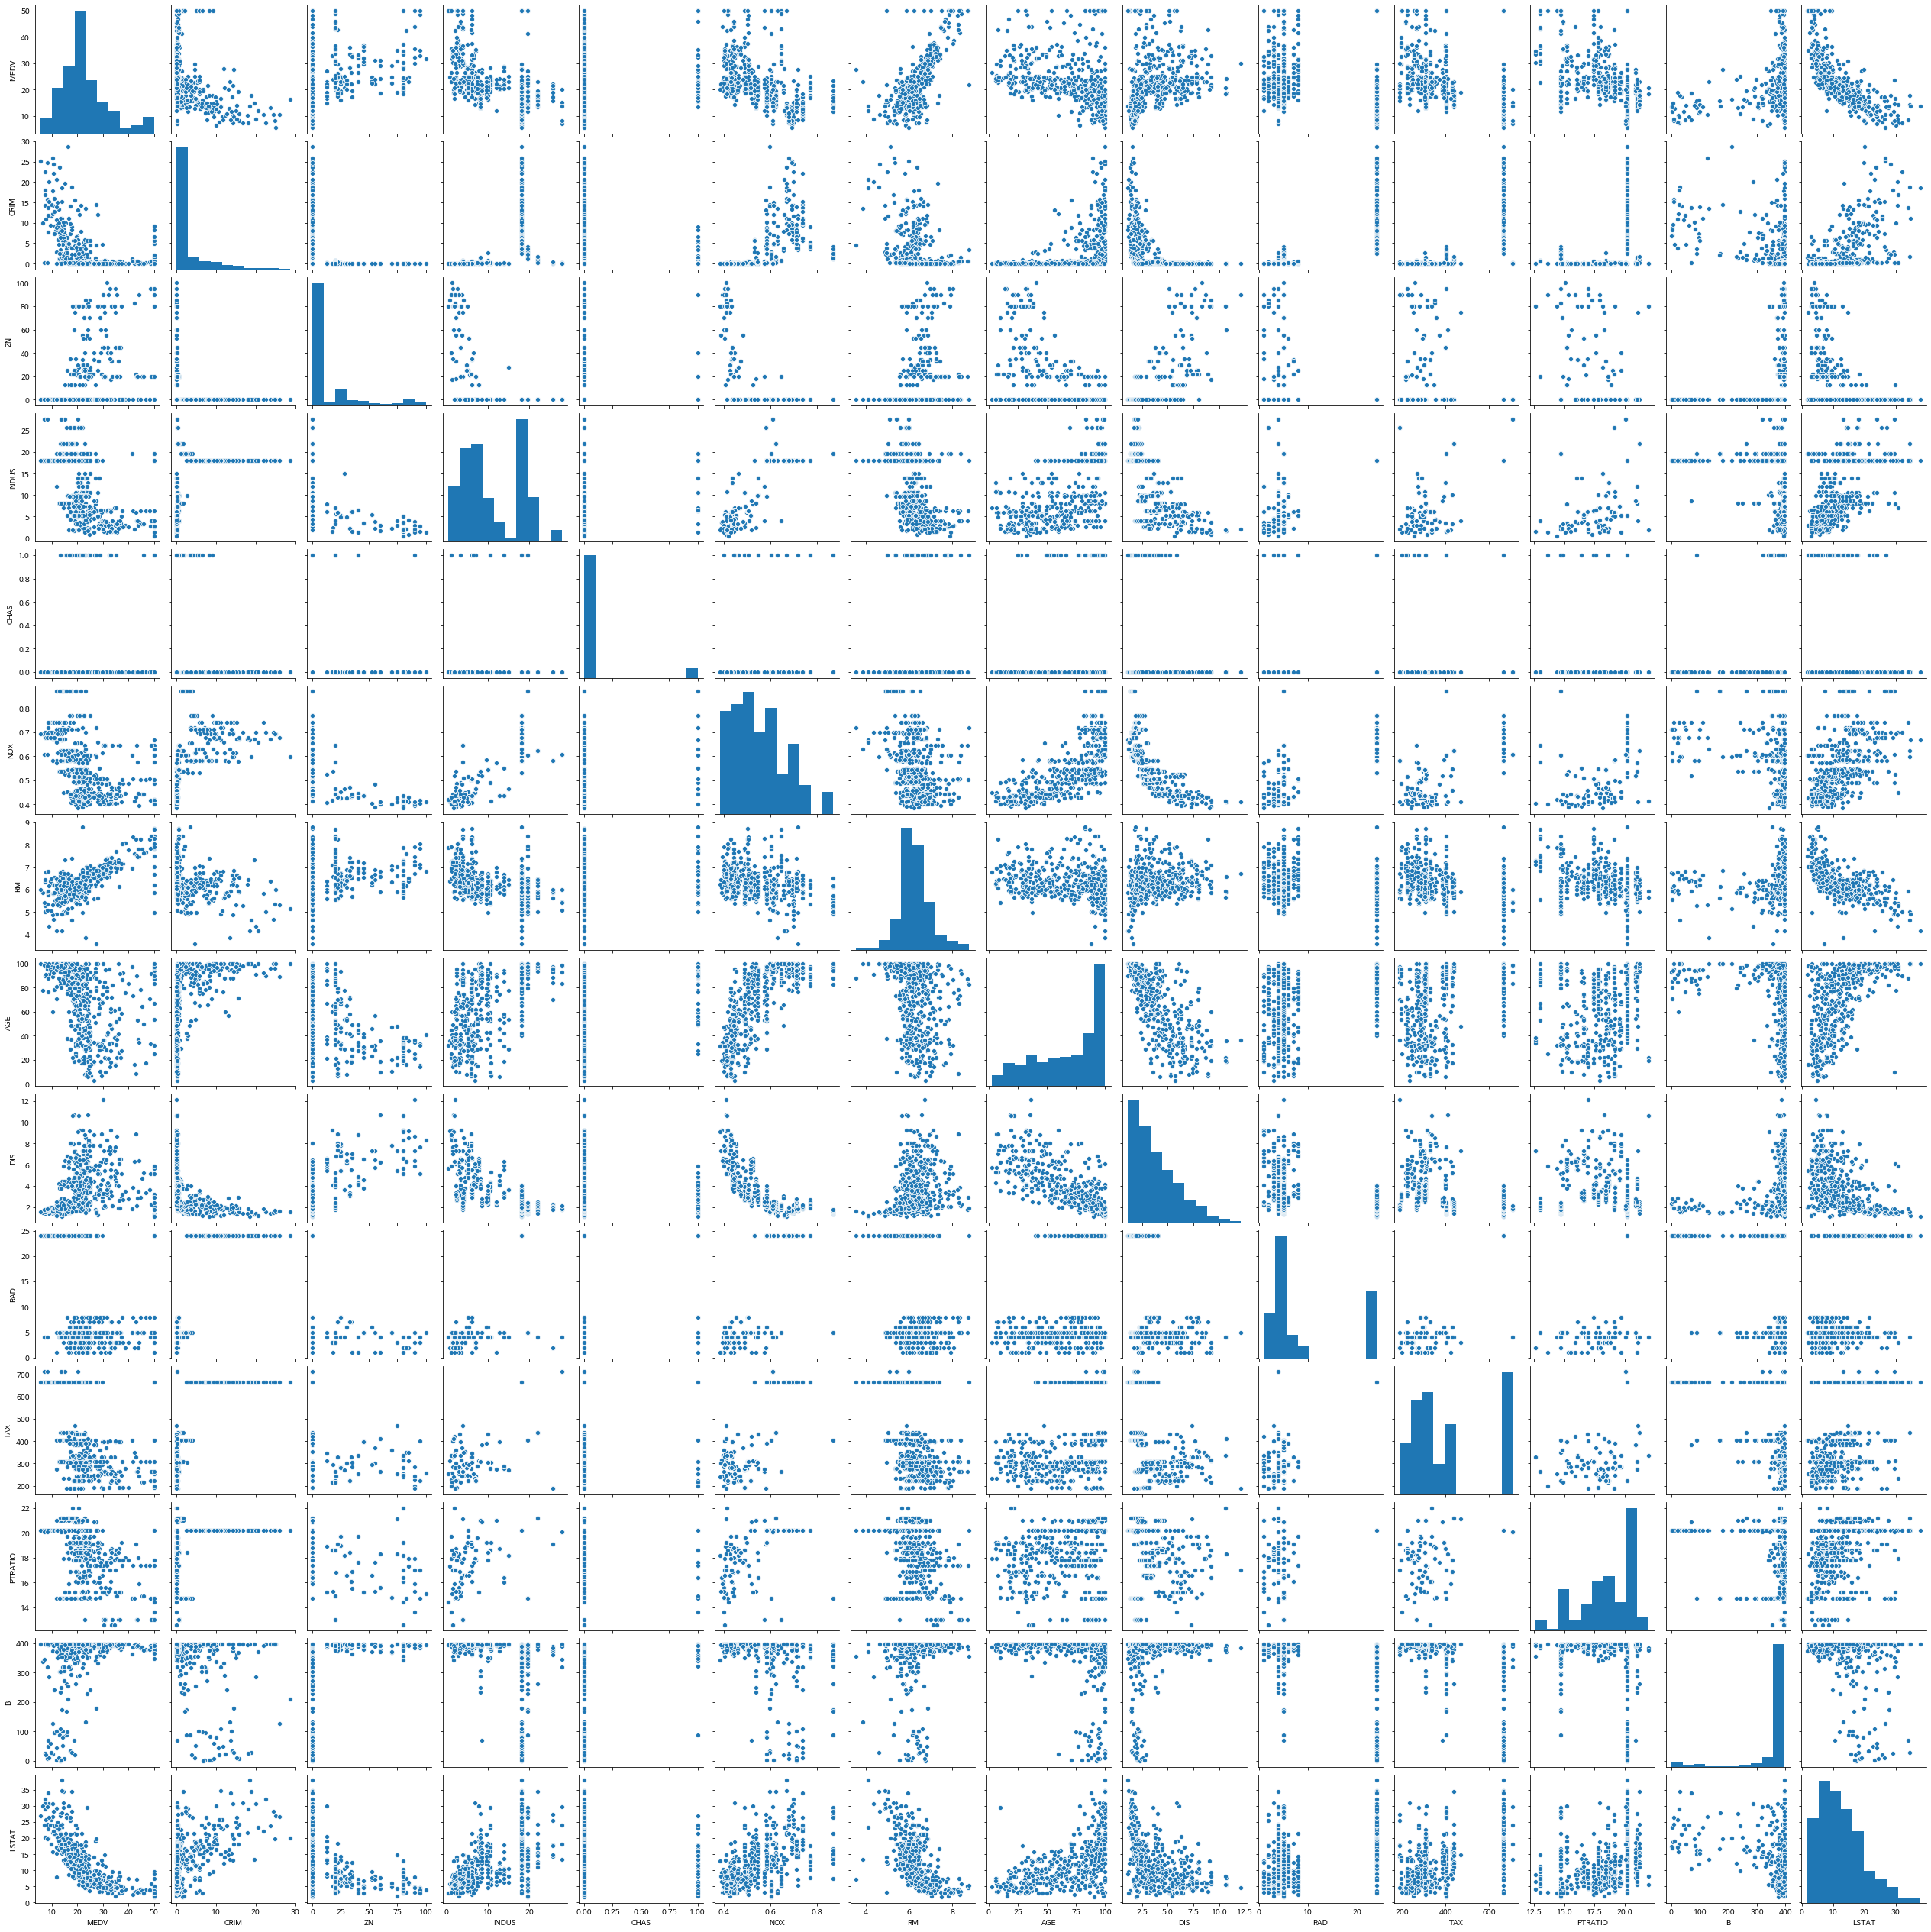

In [109]:
sns.pairplot(df_raw)
plt.show()

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


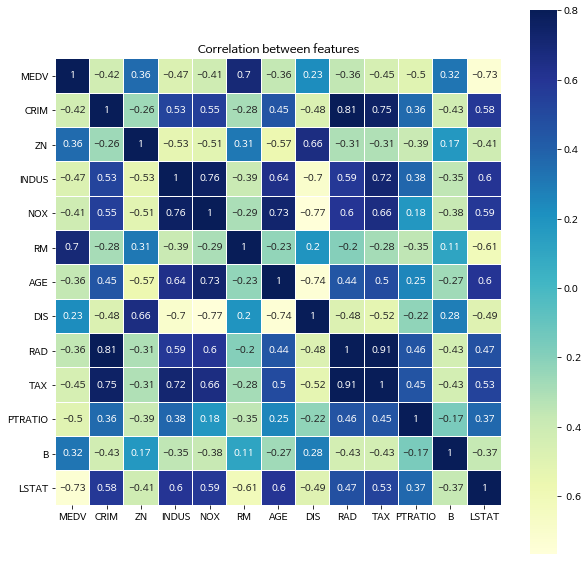

In [110]:
# heatmap을 활용한 상관관계 파악 
corr=df_raw.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

#### 1) 가격과 음의 상관 관계 : 범죄율, 비소매업 비율, 산화질소 농도, 노후 건물 비율, 고속도록 접근 편이성 지수, 재산 세율, 학생당 교사 비율, 저소득층 비율
#### 2) 가격과 양의 상관 관계 : 주거지 비율, 강 조망 여부, 주거당 평균 객실 수, 중심지(노동센터) 접근 거리, 흑인 인구 비율 

### 2-2 가설 검증 

1) 환경적 요건

* 강 조망이 있으면 주택 가격이 높을 것이다.

* 산화 질소 농도가 높으면 주택 가격이 낮을 것이다.

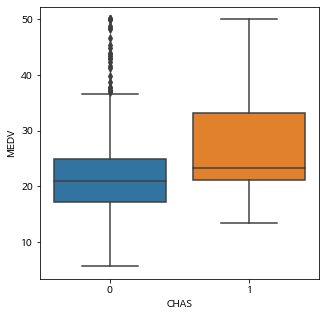

In [111]:
plt.figure(figsize=(5,5))
sns.boxplot(x='CHAS',y='MEDV', data=df_raw)
plt.show()

#### 강 조망이 없는 지역의 경우 조망이 있을 때보다 집 값이 낮은 것을 알 수 있다. 

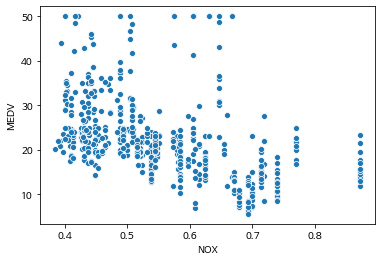

In [112]:
# scatter plot을 통한 상관관계 파악 
sns.scatterplot(x='NOX', y='MEDV',data=df_raw)

In [113]:
# 선형 회귀 분석을 통한 상관 관계 파악 
# 데이터 선언 
CRIM=df_raw["NOX"]
MEDV=df_raw["MEDV"]

# Simple Linear Regression 실행
MEDV=sm.add_constant(MEDV)
model=sm.OLS(CRIM,MEDV)
result=model.fit()

# Simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           6.48e-22
Time:                        21:22:52   Log-Likelihood:                 414.33
No. Observations:                 498   AIC:                            -824.7
Df Residuals:                     496   BIC:                            -816.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6723      0.013     52.730      0.0

#### 회귀식 : [MEDV]=-0.0053*[NOX]+0.67
#### 설명력 : 17% 
#### Prob (F-statistic) 가 0.05보다 작으므로 유의하다. 
#### P>|t| 가 0.05보다 작으므로 이 회귀식은 유의하다. 
#### 산화 질소 농도와 주택가격은 매우 약한 음의 상관관계를 보임을 알 수 있다.
>* 회귀계수가 매우 낮으므로 고려하지 않기로 한다. 

2) 접근성 요건

* 비주거 상업지역 비율이 높을수록 집값은 높을 것이다.
* 중심지 (직업 센터) 접근 거리가 가까울수록 주택 가격이 높을 것이다.
* 방사형 도로 접근성 지수가 높을수록 주택 가격이 높을 것이다.

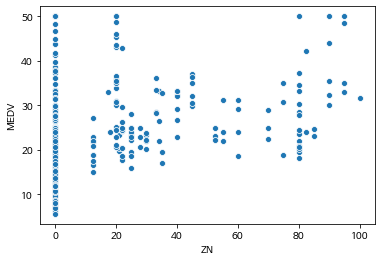

In [114]:
# scatter plot을 통한 상관관계 파악 
sns.scatterplot(x='ZN', y='MEDV',data=df_raw) 

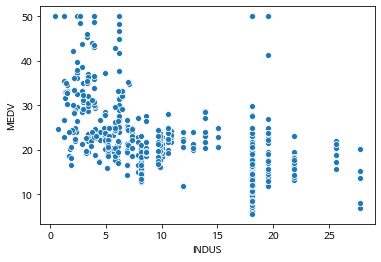

In [115]:
sns.scatterplot(x='INDUS', y='MEDV',data=df_raw)

In [116]:
# 데이터 선언 
CRIM=df_raw["ZN"]
MEDV=df_raw["MEDV"]

# Simple Linear Regression 실행
MEDV=sm.add_constant(MEDV)
model=sm.OLS(CRIM,MEDV)
result=model.fit()

# Simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     ZN   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     72.07
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           2.43e-16
Time:                        21:22:57   Log-Likelihood:                -2243.8
No. Observations:                 498   AIC:                             4492.
Df Residuals:                     496   BIC:                             4500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3620      2.652     -3.530      0.0

#### 회귀식 : [MEDV]=0.91*[ZN]-9.36
#### 설명력 : 12.7%
#### Prob (F-statistic) 가 0.05보다 작으므로 유의하다. 
#### P>|t| 가 0.05보다 작으므로 이 회귀식은 유의하다. 
#### 주거지의 비율과 주택가격은 강한 양의 상관관계를 보임을 알 수 있다. 
>* 주거지 비율이 높을수록 주택 가격은 높다.

In [117]:
# 데이터 선언 
CRIM=df_raw["INDUS"]
MEDV=df_raw["MEDV"]

# Simple Linear Regression 실행
MEDV=sm.add_constant(MEDV)
model=sm.OLS(CRIM,MEDV)
result=model.fit()

# Simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  INDUS   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     142.3
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           5.09e-29
Time:                        21:22:59   Log-Likelihood:                -1602.2
No. Observations:                 498   AIC:                             3208.
Df Residuals:                     496   BIC:                             3217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1258      0.731     26.157      0.0

#### 회귀식 : [MEDV]=-0.36*[INDUS]+19.13
#### 설명력 : 22.3%
#### Prob (F-statistic) 가 0.05보다 작으므로 유의하다. 
#### P>|t| 가 0.05보다 작으므로 이 회귀식은 유의하다. 
#### 비소매업의 비율과 주택가격은 약한 음의 상관관계를 보임을 알 수 있다. 
>* 비소매업 비율이 높을수록 주택가격은 떨어진다. 

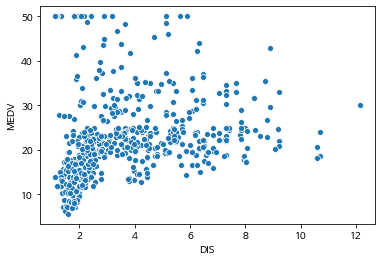

In [118]:
sns.scatterplot(x='DIS', y='MEDV',data=df_raw)

In [119]:
# 데이터 선언 
CRIM=df_raw["DIS"]
MEDV=df_raw["MEDV"]

# Simple Linear Regression 실행
MEDV=sm.add_constant(MEDV)
model=sm.OLS(CRIM,MEDV)
result=model.fit()

# Simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    DIS   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     28.00
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.83e-07
Time:                        21:23:04   Log-Likelihood:                -1062.8
No. Observations:                 498   AIC:                             2130.
Df Residuals:                     496   BIC:                             2138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6141      0.248     10.560      0.0

#### 회귀식 : [MEDV]=0.05*[DIS]+2.61
#### 설명력 : 5.3%
#### Prob (F-statistic) 가 0.05보다 작으므로 유의하다. 
#### P>|t| 가 0.05보다 작으므로 이 회귀식은 유의하다. 
#### 비소매업의 비율과 주택가격은 매우 약한 음의 상관관계를 보임을 알 수 있다. 
>* 중심지 접근 거리와 집값의 상관관계는 설명력이 매우 낮고 회귀 계수의 값도 매우 작으므로 고려하지 않기로 한다. 

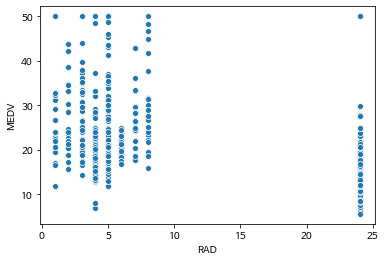

In [120]:
sns.scatterplot(x='RAD', y='MEDV',data=df_raw)

>* scatter plot에서 확인할 수 있듯이 변수간의 상관성이 거의 드러나지 않으므로 고속도로 접근 편이성 지수는 고려하지 않기로 한다.

3) 이웃 요건

* 학생/교사 비율이 낮을수록 주택 가격이 높을 것이다.
* 흑인 인구 비율이 높을수록 주택 가격이 낮을 것이다.
* 저소득층 비율이 높을수록 주택 가격이 낮을 것이다.

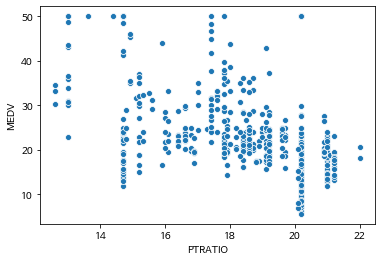

In [121]:
sns.scatterplot(x='PTRATIO', y='MEDV',data=df_raw)

In [122]:
# 데이터 선언 
CRIM=df_raw["PTRATIO"]
MEDV=df_raw["MEDV"]

# Simple Linear Regression 실행
MEDV=sm.add_constant(MEDV)
model=sm.OLS(CRIM,MEDV)
result=model.fit()

# Simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                PTRATIO   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           6.20e-33
Time:                        21:23:10   Log-Likelihood:                -1020.3
No. Observations:                 498   AIC:                             2045.
Df Residuals:                     496   BIC:                             2053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1458      0.227     93.022      0.0

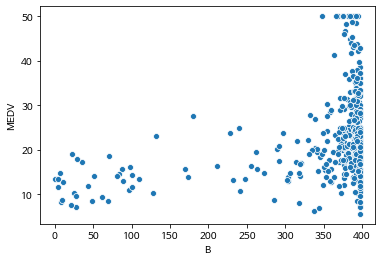

In [123]:
sns.scatterplot(x='B', y='MEDV',data=df_raw)

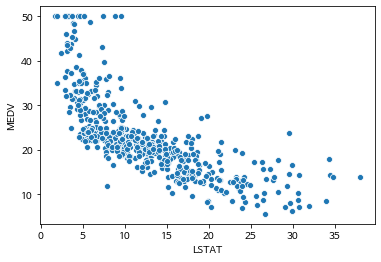

In [124]:
sns.scatterplot(x='LSTAT', y='MEDV',data=df_raw)

In [125]:
# 데이터 선언 
CRIM=df_raw["LSTAT"]
MEDV=df_raw["MEDV"]

# Simple Linear Regression 실행
MEDV=sm.add_constant(MEDV)
model=sm.OLS(CRIM,MEDV)
result=model.fit()

# Simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  LSTAT   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     574.0
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           7.64e-85
Time:                        21:23:17   Log-Likelihood:                -1484.3
No. Observations:                 498   AIC:                             2973.
Df Residuals:                     496   BIC:                             2981.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3348      0.577     43.898      0.0

4) 사회 경제적 요건

* 1인당 범죄율이 높을수록 주택 가격이 낮을 것이다.
* 주거당 평균 객실 수가 높을수록 주택 가격이 높아질 것이다.
* 재산 세율이 낮으면 주택 가격이 낮을 것이다.

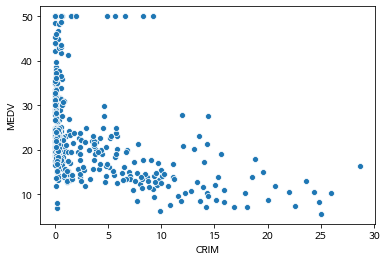

In [126]:
# scatter plot을 통한 상관관계 파악 
sns.scatterplot(x='CRIM', y='MEDV',data=df_raw)

#### 그래프상 약한 음의 상관관계를 보이므로 상관분석을 해보기로 한다. 

In [127]:
# 데이터 선언 
CRIM=df_raw["CRIM"]
MEDV=df_raw["MEDV"]

# Simple Linear Regression 실행
MEDV=sm.add_constant(MEDV)
model=sm.OLS(CRIM,MEDV)
result=model.fit()

# Simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           3.95e-23
Time:                        21:23:23   Log-Likelihood:                -1467.0
No. Observations:                 498   AIC:                             2938.
Df Residuals:                     496   BIC:                             2947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1735      0.557     14.663      0.0

#### 회귀식 : [MEDV]=-0.24*[CRIM]+8.1735 
#### 설명력 : 18% 
#### Prob (F-statistic) 가 0.05보다 작으므로 유의하다. 
#### P>|t| 가 0.05보다 작으므로 이 회귀식은 유의하다. 
#### 범죄율과 주택가격은 약한 음의 상관관계를 보임을 알 수 있다. 
>* 범죄율이 높을수록 주택가격은 하락한다. 

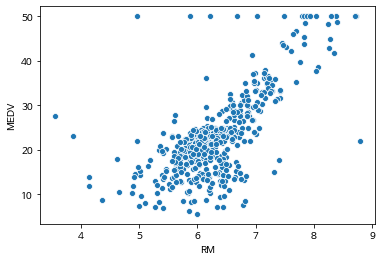

In [128]:
# scatter plot을 통한 상관관계 파악 
sns.scatterplot(x='RM', y='MEDV',data=df_raw)

In [129]:
# 데이터 선언 
CRIM=df_raw["RM"]
MEDV=df_raw["MEDV"]

# Simple Linear Regression 실행
MEDV=sm.add_constant(MEDV)
model=sm.OLS(CRIM,MEDV)
result=model.fit()

# Simple Linear Regression 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     RM   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     466.9
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.81e-73
Time:                        21:23:28   Log-Likelihood:                -363.46
No. Observations:                 498   AIC:                             730.9
Df Residuals:                     496   BIC:                             739.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0733      0.061     83.464      0.0

# 3. 다중 회귀 분석

In [130]:
df_raw=df_raw.astype({'CHAS':object})

### 3-1 회귀 모델 생성

In [131]:
# 선형 회귀 분석 :formula(y~X1+X2+...)이용. 상수항(Intercept)자동 추가. 
reg_model=smf.ols(formula='MEDV~CRIM+ZN+INDUS+C(CHAS)+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=df_raw)

#적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          2.49e-130
Time:                        21:23:31   Log-Likelihood:                -1474.9
No. Observations:                 498   AIC:                             2978.
Df Residuals:                     484   BIC:                             3037.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.2182      5.191      6.785   

#### 설명력 : 74.1% 
#### Prob (F-statistic) 가 0.05보다 작으므로 유의하다. 
#### P>|t| 는 변수 CRIM(범죄율), INDUS(비소매업 비율), AGE(노후건물 비율)를 제외하고는 0.05보다 작으므로 유의하다. 

### 3-2 다중공선성 재확인 

In [132]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가 
df_raw_x=df_raw.drop(["MEDV","CHAS"],axis=1)

# statsmodels의 상수항 추가 함수 적용 
df_raw_x_const=add_constant(df_raw_x)

# DataFrame으로 저장 
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values,i)\
             for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
11,B,1.338
10,PTRATIO,1.771
5,RM,1.933
2,ZN,2.320
6,AGE,3.083
12,LSTAT,3.108
1,CRIM,3.570
3,INDUS,3.900
7,DIS,3.959
4,NOX,4.347


#### 모든 변수의 다중 공선성은 범위 내에 있으므로 제거하지 않는다. 

### 3-3 후진제거법으로 중요 변수 추출

In [88]:
# 목표 변수 분리
df_raw_y=df_raw['MEDV']

# sklearn의 선형회귀 모델 
model=LinearRegression()

#전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe=RFE(estimator=model, n_features_to_select=5).fit(df_raw_x,df_raw_y)

#선택된 변수 
selected_cols=df_raw_x.columns[rfe.support_]
removed_cols=df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
Removed Variables : Index(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B'], dtype='object')


In [89]:
# 남은 변수들로 회귀 모델 생성 
rfe_reg_model=smf.ols(formula='MEDV~LSTAT+NOX+RM+DIS+PTRATIO',data=df_raw)
rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          3.67e-131
Time:                        03:47:41   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

#### 설명력 : 63.4% 
#### Prob (F-statistic) 가 0.05보다 작으므로 유의하다. 
#### P>|t| 는 모든 변수에서 0.05보다 작으므로 유의하다. 
>* 기존의 모델보다 설명력이 감소하였다. 

In [90]:
#남은변수들 다중공선성 재진단
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

#다중공선성 저장
df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_x_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF",inplace = True)
df_rfe_vif.round(3)

,variable,VIF
4,PTRATIO,1.223
2,RM,1.697
5,LSTAT,2.373
3,DIS,2.547
1,NOX,2.891
0,const,431.752


#### 해당 설명변수에 다중 공선성 문제가 없음을 확인하였다. 

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


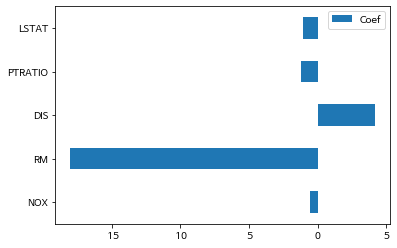

In [91]:
#회귀 계수의 정규화 비교 (비표준화 회귀계수 기준)
df_reg_coef=pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]},\
                         index = selected_cols)
df_reg_coef.plot.barh(y='Coef', legend=True) 

In [97]:
# 설명변수 표준화 적용->표준화 회귀계수 산출 목적
scaler=StandardScaler()

# Scale 변환대상 변수:일반적으로 설명변수
cols=df_raw_x.columns

# Scale 변환
np_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(np_scaled,columns=cols)

# 목표변수 추가
df_scaled['MEDV']=df_raw['MEDV']
reg_model_scaled=smf.ols(formula='MEDV~LSTAT+NOX+RM+DIS+PTRATIO',data=df_scaled)
reg_result_scaled=reg_model_scaled.fit()

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


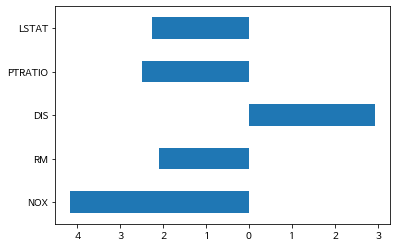

In [94]:
df_reg_coef=pd.DataFrame({'Coef':reg_result_scaled.params.values[1:]},index=selected_cols)
df_reg_coef.plot.barh(y='Coef',legend=False)

In [95]:
df_reg_coef

,Coef
NOX,-4.145451
RM,-2.083339
DIS,2.922319
PTRATIO,-2.492089
LSTAT,-2.261805


>* 표준화하였을 때, 변수의 중요도는 주거당 평균 객실 수, 산화질소 농도, 학생당 교사 비율, 중심지(노동센터) 접근거리, 강 조망 여부 순이었다. 

# 4. 의사 결정 나무 

### 4-1 데이터 불러오기

In [33]:
#step1:데이터 구성하기
df_raw = pd.read_csv("/home/piai/Downloads/BOSTON_HOUSING.csv",engine = 'python', encoding='cp949')

#설명변수, 목적변수 나눔
df_raw_y=df_raw['MEDV']
df_raw_x=df_raw.drop("MEDV",axis=1,inplace=False)

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(354, 13)
train data Y size:(354,)
test data X size:(152, 13)
test data Y size:(152,)


### 4-2 모델 생성하기 

In [34]:
#모델 생성하기
tree_uncustomized=DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set:1.000
Score on test set:0.852


#### train test의 정확도는 100%로 과대적합되어 있다. 

### 4-3 파라미터 조정 

### 입사귀 최소 자료수 조정 

In [35]:
# 변수명 저장
v_feature_name=df_train_x.columns
#train 및 test 설명력 결과 저장
train_score=[];test_score=[]
#min_samples_leaf:입사귀 최소자료수
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234
                              , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

#결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.852
1,2,0.987,0.849
2,3,0.973,0.865
3,4,0.951,0.854
4,5,0.928,0.861
5,6,0.898,0.853
6,7,0.885,0.843
7,8,0.874,0.838
8,9,0.862,0.831
9,10,0.849,0.831


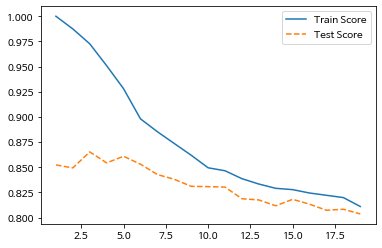

In [36]:
#min sample leaf 선정
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='--',label='Test Score')
plt.legend()

#### Trainscore와 train/test 성능을 고려하여 3을 선택한다. 
#### min_samples_leaf=3

### 분리 노드의 최소 자료수 

In [37]:
#train 및 test 설명력 결과 저장
train_score=[];test_score=[]
#min_samples_split:분리 노드의 최소 자료수
para_split=[n_split*2 for n_split in range(2,40)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=3,
                               min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
#결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.973,0.865
1,6,0.973,0.865
2,8,0.963,0.866
3,10,0.960,0.870
4,12,0.958,0.871
5,14,0.953,0.874
6,16,0.944,0.859
7,18,0.937,0.864
8,20,0.919,0.868
9,22,0.912,0.862


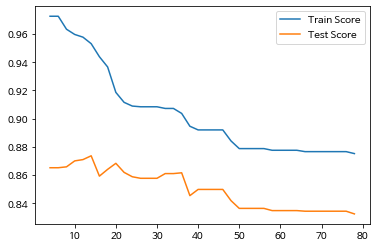

In [38]:
#모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='-',label='Test Score')
plt.legend()

#### Trainscore와 train/test 성능을 고려하여 14를 선택한다. 
#### min_samples_split=14

### 최대 깊이 변경

In [39]:
#train 및 test 설명력 결과 저장
train_score=[]; test_score=[]
#max_depth: 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=3,
                               min_samples_split=14,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
#데이터 테이블로 저장
df_score_split=pd.DataFrame()
df_score_split['Depth']=para_depth
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score
df_score_split.round(3)

,Depth,TrainScore,TestScore
0,1,0.442,0.443
1,2,0.692,0.711
2,3,0.807,0.775
3,4,0.886,0.842
4,5,0.912,0.855
5,6,0.932,0.853
6,7,0.944,0.862
7,8,0.947,0.869
8,9,0.949,0.872
9,10,0.950,0.874


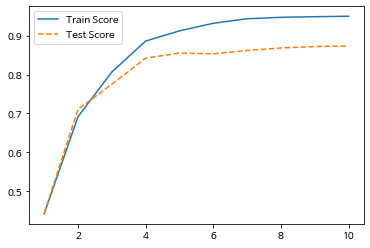

In [40]:
#모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.legend()

#### Trainscore와 train/test 성능을 고려하여 5를 선택한다. 
#### max_depth=5

### 4-4 최종 모델 선정

In [41]:
#STEP3:최종 모델 선정
tree_final=DecisionTreeRegressor(min_samples_leaf=3,min_samples_split=14,max_depth=5,random_state=1234)
tree_final.fit(df_train_x,df_train_y)

#최종 모델 성능
print("최종 Score on training set:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("최종 Score on test set:{:.3f}".format(tree_final.score(df_test_x,df_test_y)))

최종 Score on training set:0.912
최종 Score on test set:0.855


#### 모델 수정 결과 train set의 경우 91.2%로 정확도가 감소하였고 test set의 경우 85.5로 0.3% 상승하였다. 

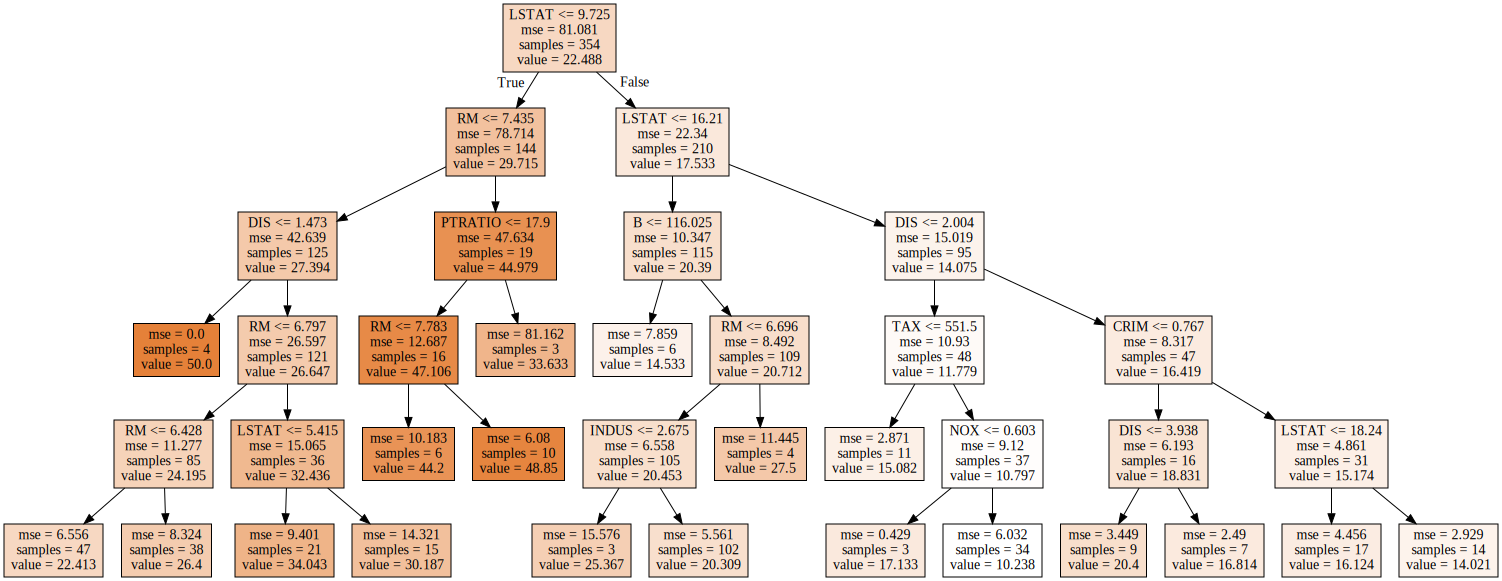

In [42]:
# 최종 모델 시각화
export_graphviz(tree_final, out_file="tree_final.dot",\
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_final.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [29]:
import pydot

ModuleNotFoundError: No module named 'pydot'

### 4-5 설명 변수의 중요도 

In [43]:
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.569
5,RM,0.283
7,DIS,0.102
10,PTRATIO,0.018
11,B,0.008
9,TAX,0.006
0,CRIM,0.005
4,NOX,0.005
2,INDUS,0.003
1,ZN,0.000


Text(0, 0.5, '변수')

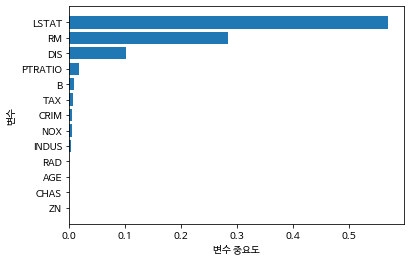

In [44]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

>* 의사결정나무 모델 결과, 중요도는 저소득층 비율, 주거당 평균 객실 수, 중심지(노동센터)접근 거리, 학생당 교사 비율 순이었다. 

# 5. 랜덤 포레스트 

### 5-0 패키지 불러오기 

In [45]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz:나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphviz:나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 예측/회귀 Random FOrest
from sklearn.ensemble import RandomForestRegressor

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

### 5-1 데이터 불러오기

In [46]:
#목표변수, 설명변수 데이터 지정 
df_raw_y=df_raw['MEDV']
df_raw_x=df_raw.drop('MEDV', axis=1, inplace
                     =False)

In [47]:
# train, test 데이터를 7:3 비율로 분할한다. 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (354, 13)
train data Y size : (354,)
test data X size : (152, 13)
test data Y size : (152,)


In [48]:
# train, validation 데이터를 4:3 비율로 분할한다. 
df_train2_x,df_val_x,df_train2_y,df_val_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
print("train data X size : {}".format(df_train2_x.shape))
print("train data Y size : {}".format(df_train2_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

train data X size : (202, 13)
train data Y size : (202,)
validation data X size : (152, 13)
validation data Y size : (152,)


### 5-2 모델 생성 

In [49]:
rf_uncustomized=RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.981
Score on test set:0.900


>* 모델의 설명력은 train set은 98.1%, test set은 90%이다. 

### 5-3 파라미터 변경

### 트리수 변경

In [50]:
# 1. 트리 수 변경에 따른 모델 성능 

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# max_depth:최대 깊이 변경
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(random_state=1234,n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_n=pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.975,0.886
1,20,0.981,0.901
2,30,0.980,0.900
3,40,0.979,0.900
4,50,0.979,0.899
5,60,0.981,0.901
6,70,0.981,0.900
7,80,0.982,0.900
8,90,0.982,0.900
9,100,0.981,0.900


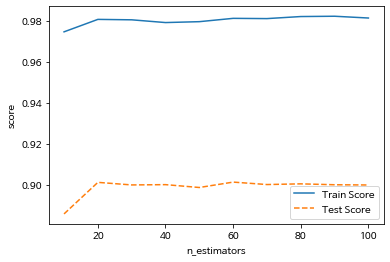

In [51]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

>* n_estimators=20

### 잎사귀 노드의 최소 자료수 

In [52]:
# 2. 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능 

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# min_samples_leaf:잎사귀 최소 자료 수
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.981,0.900
1,2,0.967,0.894
2,3,0.947,0.890
3,4,0.928,0.883
4,5,0.909,0.876
5,6,0.895,0.870
6,7,0.883,0.866
7,8,0.873,0.862
8,9,0.866,0.858
9,10,0.859,0.854


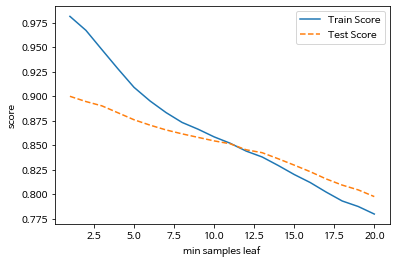

In [53]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

#### train 정확도와 test 정확도는 지속적으로 감소하므로 train 정확도와 두 정확도의 차이를 고려하여 3개로 정한다. 
>* min_samples_leaf=3

### 분리 노드의 최소 자료수

In [54]:
# 3. 분리 노드의 최소 자료수 변경에 따른 모델 성능  

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# min_samples_split:분리 노드의 최소 자료 수
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234,n_estimators=100,\
                               min_samples_leaf=9,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.866,0.858
1,6,0.866,0.858
2,8,0.866,0.858
3,10,0.866,0.858
4,12,0.866,0.858
5,14,0.866,0.858
6,16,0.866,0.858
7,18,0.866,0.858
8,20,0.863,0.856
9,22,0.861,0.856


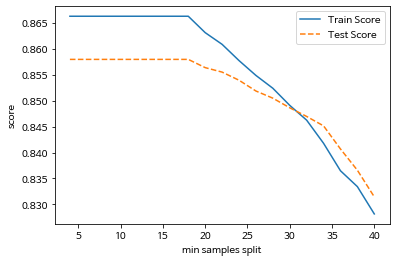

In [55]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

>* min_sample_split=10  

### 최대 깊이 변경

In [56]:
# 4. 최대 깊이 변경에 따른 모델 성능 

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# max_depth:최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234,n_estimators=100,\
                               min_samples_leaf=9,min_samples_split=18,\
                               max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.581,0.601
1,2,0.768,0.779
2,3,0.825,0.833
3,4,0.850,0.854
4,5,0.862,0.857
5,6,0.865,0.858
6,7,0.866,0.858
7,8,0.866,0.858
8,9,0.866,0.858
9,10,0.866,0.858


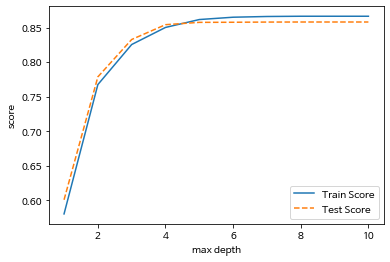

In [57]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

>* max_depth=7

In [58]:
# 1. 최종 모델 시각화 
rf_final=RandomForestRegressor(min_samples_leaf=3,min_samples_split=10,\
                                max_depth=7,random_state=1234,n_estimators=20)
rf_final.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))

Score on training set:0.892
Score on test set:0.892


>* 파라미터를 조절하였을 때, train과 test의 정확도 모두 감소했지만 일치하게 되어 과대 적합을 최소화할 수 있엇다. 

In [59]:
rf_final

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=20, random_state=1234)

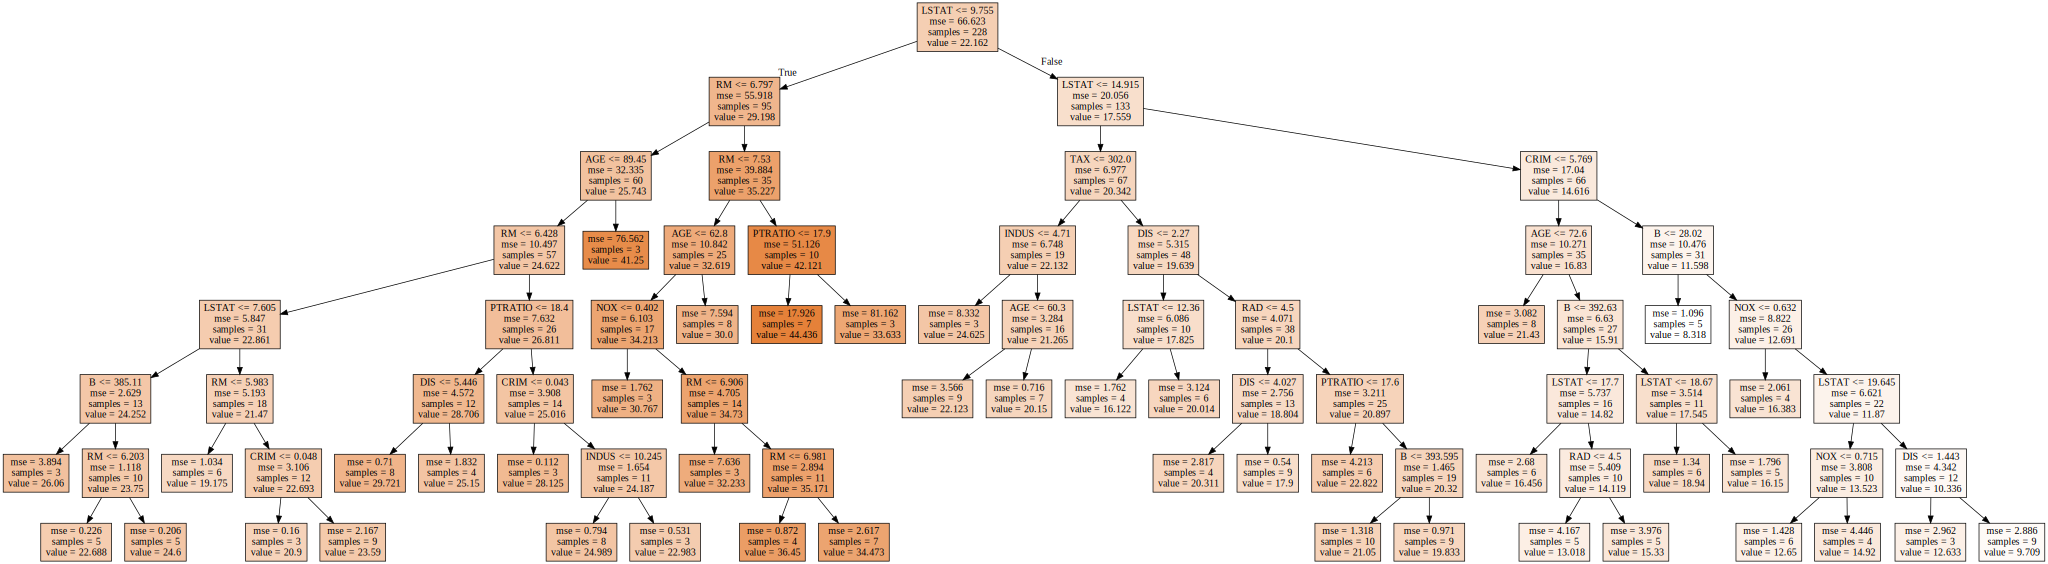

In [60]:
# 변수명 저장
v_feature_name=df_test_x.columns

# 0번 트리
export_graphviz(rf_final.estimators_[0],out_file='rfr_final_0.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)

# tree_final_0.dot 그리기
with open('rfr_final_0.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

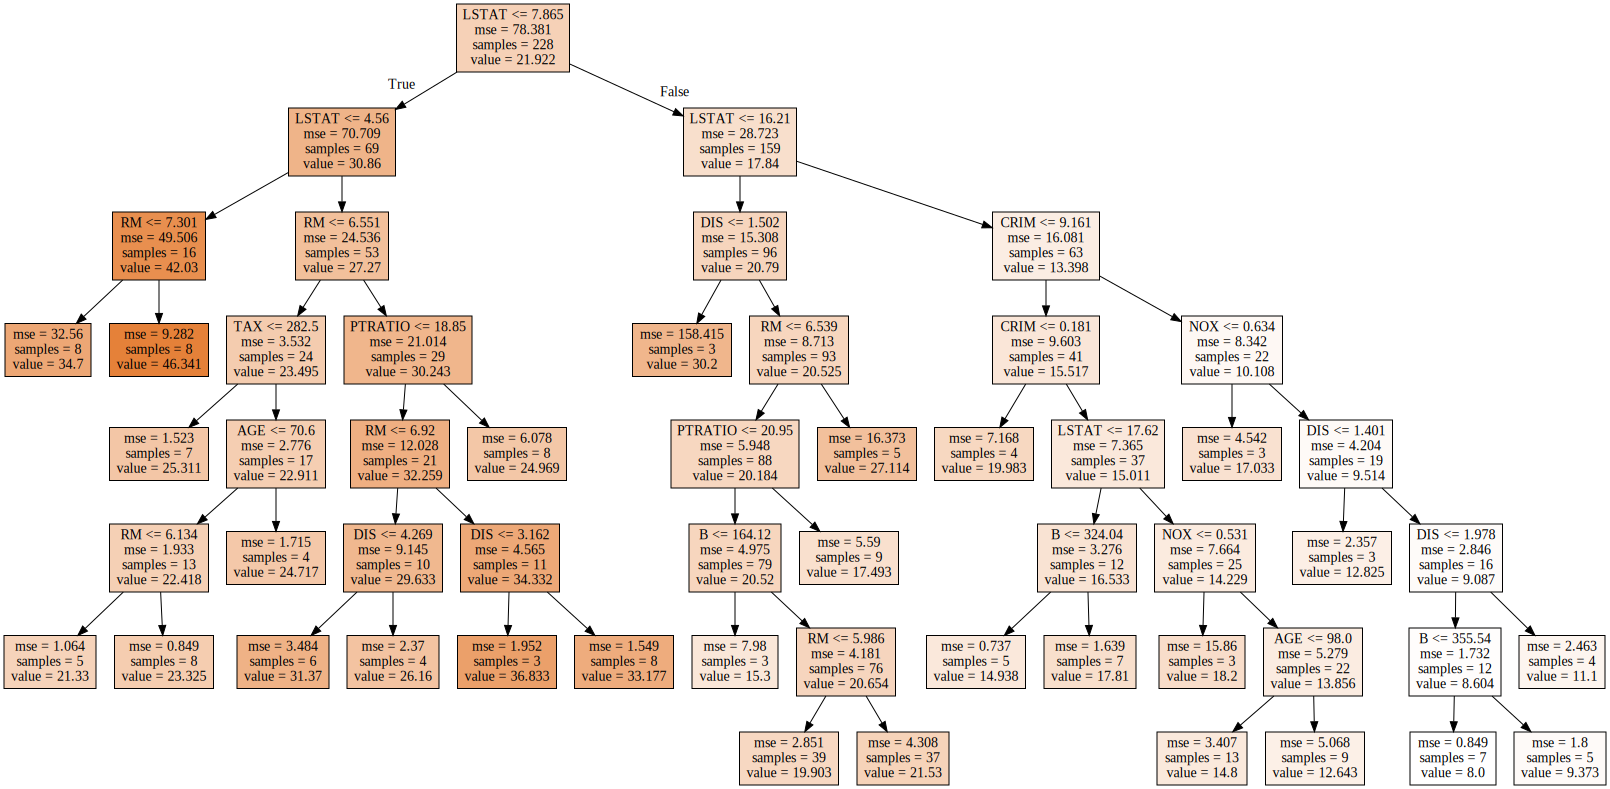

In [61]:
# 1번 트리
export_graphviz(rf_final.estimators_[1],out_file='rfr_final_1.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)

# tree_final_1.dot 그리기
with open('rfr_final_1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

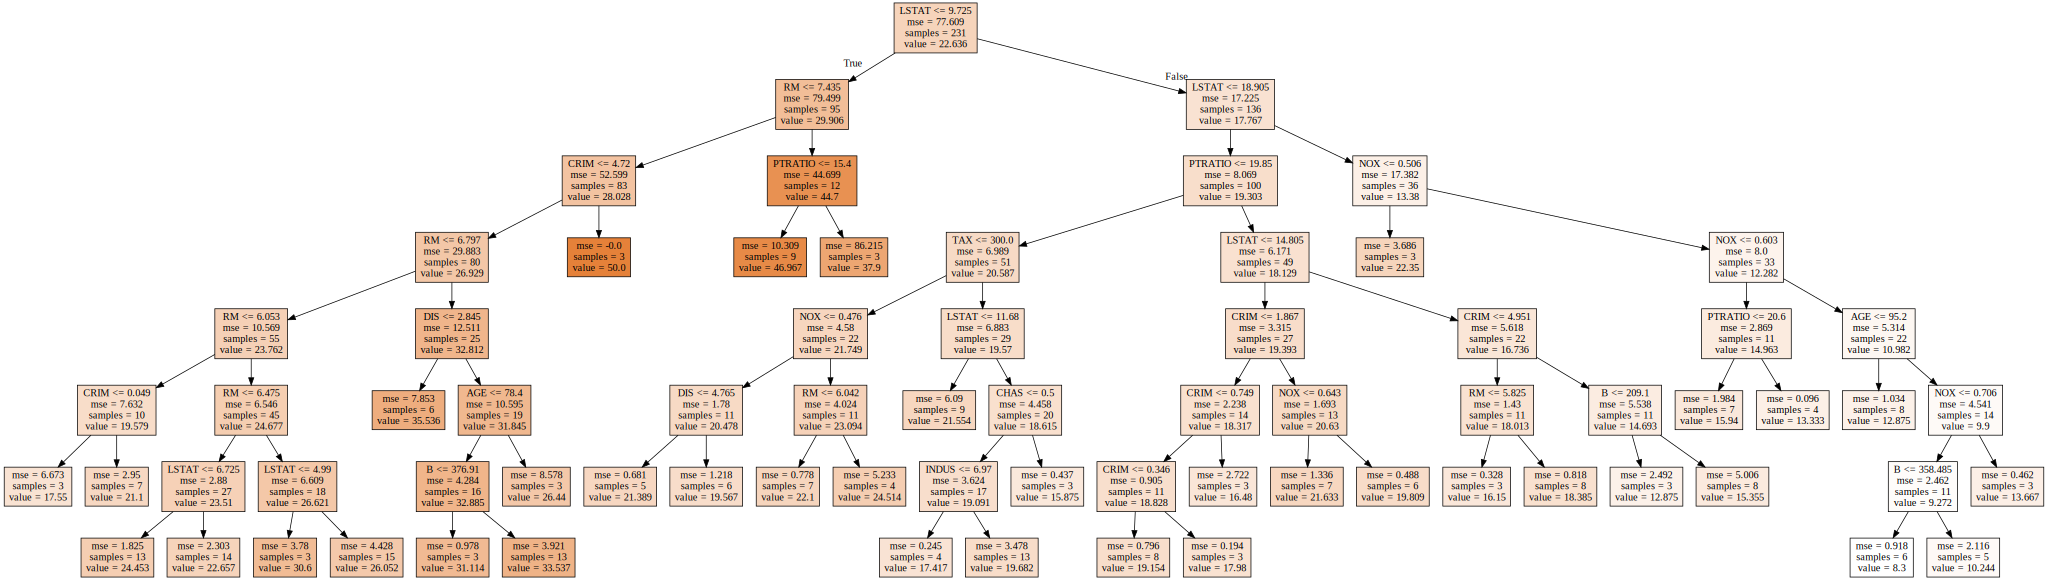

In [62]:
# 10번 트리
export_graphviz(rf_final.estimators_[10],out_file='rfr_final_10.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)

# tree_final_10.dot 그리기
with open('rfr_final_10.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 5-5 설명 변수의 중요도 

In [63]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.496
5,RM,0.342
7,DIS,0.049
0,CRIM,0.030
6,AGE,0.023
10,PTRATIO,0.018
4,NOX,0.014
9,TAX,0.012
11,B,0.007
2,INDUS,0.006


Text(0, 0.5, '변수')

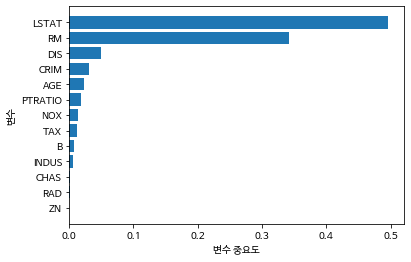

In [64]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

>* 설명변수의 중요도는 저소득층 비율, 주거당 평균 객실수, 중심지(노동센터) 접근 거리, 범죄율, 노후 건물 비율 순이었다. 

# 6. 그래디언트 부스팅

### 6-0 모듈 불러오기 

In [65]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz:나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphviz:나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 예측/회귀 Random Forest
from sklearn.ensemble import GradientBoostingRegressor

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

### 6-1 데이터 전처리 (중복 생략)

### 6-2 모델 생성

In [66]:
gb_uncustomized=GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x,df_train_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.981
Score on test set:0.903


### 6-3 파라미터 변경

### n_estimators

In [67]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# n_estimatos:최대 깊이 변경
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=v_n_estimators)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_n=pd.DataFrame()
df_score_n['Estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

# 모델 설명력 확인
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.770,0.753
1,20,0.907,0.866
2,30,0.942,0.888
3,40,0.957,0.895
4,50,0.965,0.898
5,60,0.970,0.899
6,70,0.974,0.900
7,80,0.978,0.903
8,90,0.979,0.903
9,100,0.981,0.903


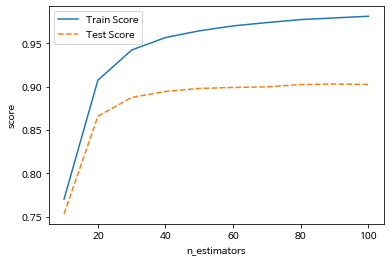

In [68]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

>* n_estimators=80

### min_samples_leaf

In [69]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# min_samples_leaf:잎사귀 최소 자료 수
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=80,\
                               min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.978,0.903
1,2,0.976,0.895
2,3,0.974,0.902
3,4,0.972,0.904
4,5,0.970,0.896
5,6,0.967,0.897
6,7,0.963,0.890
7,8,0.960,0.888
8,9,0.960,0.901
9,10,0.958,0.904


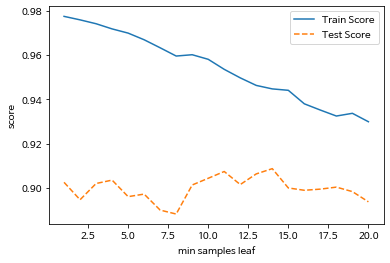

In [70]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

>* min_samples_leaf=14

### min_samepls_split 

In [71]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# min_samples_split:분리 노드의 최소 자료 수
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=80,\
                               min_samples_leaf=14,min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.945,0.909
1,6,0.945,0.909
2,8,0.945,0.909
3,10,0.945,0.909
4,12,0.945,0.909
5,14,0.945,0.909
6,16,0.945,0.909
7,18,0.945,0.909
8,20,0.945,0.909
9,22,0.945,0.909


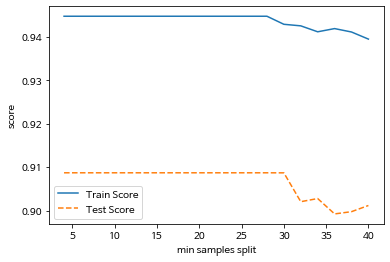

In [72]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

>* min_samples_split은 의미가 없으므로 뺀다. 

In [73]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# max_depth:최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=80,\
                               min_samples_leaf=14,max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.843,0.840
1,2,0.917,0.889
2,3,0.945,0.909
3,4,0.966,0.911
4,5,0.973,0.908
5,6,0.977,0.915
6,7,0.980,0.916
7,8,0.979,0.917
8,9,0.980,0.914
9,10,0.981,0.915


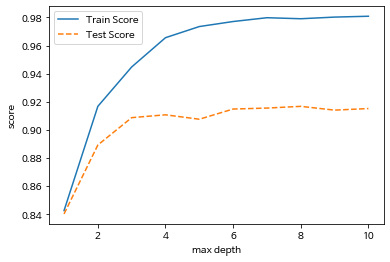

In [74]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

>* max_depth=8

### learning_rate

In [75]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# learning rate:학습률 변경 0.1~0.9 변경
para_lr=[lr*0.01 for lr in range(1,30)]

for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=80,\
                               min_samples_leaf=14, max_depth=8,learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_lr=pd.DataFrame()
df_score_lr['LearningRate']=para_lr
df_score_lr['TrainScore']=train_score
df_score_lr['TestScore']=test_score

# 모델 설명력 확인
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.01,0.688,0.685
1,0.02,0.862,0.842
2,0.03,0.915,0.881
3,0.04,0.935,0.891
4,0.05,0.949,0.896
5,0.06,0.959,0.903
6,0.07,0.966,0.907
7,0.08,0.972,0.909
8,0.09,0.976,0.907
9,0.10,0.979,0.917


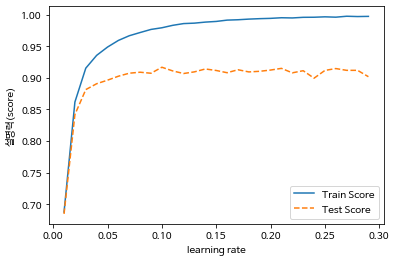

In [76]:
#모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = "--", label = 'Test Score')
plt.ylabel('설명력(score)')
plt.xlabel('learning rate')
plt.legend()

>* learning rate=0.1

### 6-4 최종 모델 

In [77]:
gb_final=GradientBoostingRegressor(min_samples_leaf=14, max_depth=8,random_state=1234,n_estimators=80,\
                                  learning_rate=0.1)
gb_final.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(gb_final.score(df_test_x,df_test_y)))

Score on training set:0.979
Score on test set:0.917


>* traing set의 정확도는 다소 감소하지만 test의 정확도가 상승하였다. 

### 6-5 설명 변수의 중요도 

In [78]:
# 변수명 저장
v_feature_name=df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.501
5,RM,0.315
7,DIS,0.042
4,NOX,0.033
6,AGE,0.029
0,CRIM,0.025
10,PTRATIO,0.014
2,INDUS,0.013
9,TAX,0.011
11,B,0.008


Text(0, 0.5, '변수')

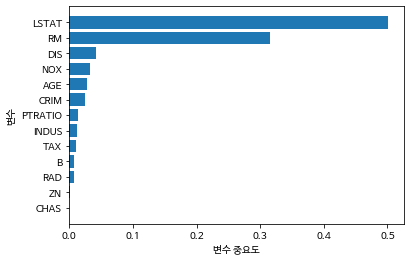

In [79]:
# 설명변수 중요도 그래프
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

>* 저소득층 비율, 주거당 평균 객실 수, 중심지(노동센터) 접근 거리, 산화질소 농도, 노후 건물 비율, 범죄율순 

# 7.중요변수로 회귀모델 돌리기 

In [118]:
#예측 및 평가
models = ["Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

mse, rmse, mae, mape = [],[],[],[]


#예측 
reg_y_pred =reg_result.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, reg_y_pred))
rmse.append(root_mean_squared_error(df_test_y, reg_y_pred))
mae.append(mean_absolute_error(df_test_y, reg_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, reg_y_pred))

###의사결정나무
#예측
dt_y_pred = tree_final.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

###랜덤포레스트
#예측
rf_y_pred = rf_final.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

###그래디언트 부스팅
#예측
gb_y_pred = gb_final.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

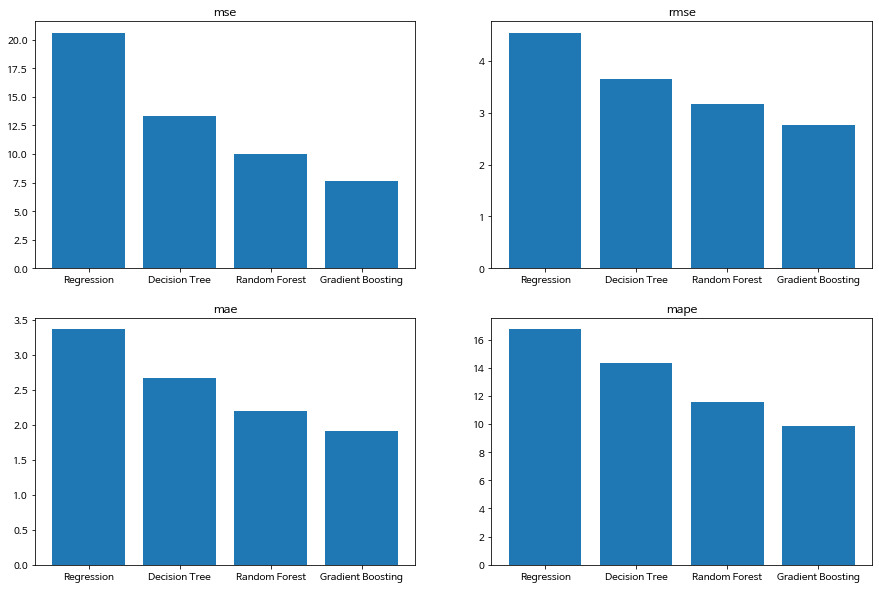

In [119]:
#시각화 - 평가
fig, ax = plt.subplots(2,2, figsize = (15,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(12)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(12)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(12)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(12)